In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
# List files in your Drive to verify the path
!ls "/content/drive/MyDrive/"

 22032025170487.pdf			   'resume (1).pdf'
'Colab Notebooks'			   'resume (2).pdf'
'Final Project Report: SoulSync Bot.gdoc'  'resume (3).pdf'
'Final Report.gdoc'			   'resume (4).pdf'
'IMG_20250428_120512 (1).jpg'		    resume_m.pdf
 IMG_20250428_120512.jpg		    resume.pdf
'Islam Ul Nabi.docx'			   'SoulSync 02.docx'
'Links .gdoc'				    SubmissionFile.gdoc
'Machine Learning'			   'Untitled document.gdoc'
'ML Engineer Islam Nabi_resume.pdf'	    Yolo_V9_FYP
'Outline for 3 Months’ Bootcamp.gdoc'


In [14]:
import pandas as pd

# Update the path to your dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/Titanic-Dataset.csv"
data = pd.read_csv(file_path)

# Quick preview
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
# Drop rows with missing values in key columns
data = data.dropna(subset=["Age", "Fare", "Survived"])

# Optional: Convert 'Sex' to numerical (0/1) if needed
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

print("Cleaned Data Shape:", data.shape)

Cleaned Data Shape: (714, 12)


In [16]:
# Select features (X) and target (y)
X = data[["Age", "Fare"]]
y = data["Survived"]

print("Features:", X.columns.tolist())

Features: ['Age', 'Fare']


In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

# Accuracy
accuracy = model.score(X, y)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 65.69%


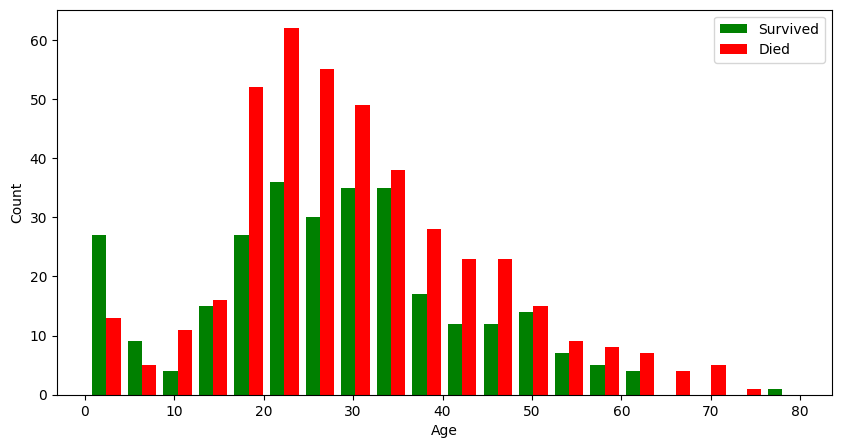

In [18]:
import matplotlib.pyplot as plt

# Plot Age vs. Survival
plt.figure(figsize=(10, 5))
plt.hist([data[data['Survived']==1]['Age'], data[data['Survived']==0]['Age']],
         bins=20, label=['Survived', 'Died'], color=['green', 'red'])
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend()
plt.show()

Improving Titanic Survival Prediction Accuracy (Beyond 65%)

In [19]:
# Create new features
data['FamilySize'] = data['SibSp'] + data['Parch']
data['IsAlone'] = (data['FamilySize'] == 0).astype(int)
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

In [20]:
# Select more meaningful features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'IsAlone', 'FamilySize', 'Embarked', 'Title']
X = pd.get_dummies(data[features])  # One-hot encode categorical variables
y = data['Survived']

# Handle missing values
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Fare'].fillna(X['Fare'].median(), inplace=True)

<ipython-input-20-a0dd6306dd19>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].median(), inplace=True)
<ipython-input-20-a0dd6306dd19>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [21]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "SVM": SVC(kernel='rbf', probability=True)
}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}: {scores.mean():.2%} ± {scores.std():.2%}")

Random Forest: 81.10% ± 3.48%
Gradient Boosting: 83.20% ± 2.52%
SVM: 66.95% ± 7.45%
